<a href="https://colab.research.google.com/github/Neha-Seirah/ML-Activities-/blob/main/LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
#top 5 rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df1=df[['OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract']]

In [10]:
df1

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Yes,No,No,No,No,Month-to-month
1,No,Yes,No,No,No,One year
2,Yes,No,No,No,No,Month-to-month
3,No,Yes,Yes,No,No,One year
4,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year
7039,Yes,Yes,No,Yes,Yes,One year
7040,No,No,No,No,No,Month-to-month
7041,No,No,No,No,No,Month-to-month


In [11]:
df=df.drop(columns=["customerID"])

In [12]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
def cat (df):
  categorical_variables=[]
  for call in df.columns:
    if df[call].dtype=="object":
      categorical_variables.append(call)
  return categorical_variables
cat(df)


cv=cat(df)
print(cv)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [14]:
le=LabelEncoder()
for col in cv:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [15]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


#performing logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef

In [17]:
df["monthly_charges_fraction"] = df["MonthlyCharges"] / df["TotalCharges"]

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthly_charges_fraction
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,2505,0,0.011916
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1466,0,0.038847
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,157,1,0.342994
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1400,0,0.030214
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,925,1,0.076432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,84.80,1597,0,0.053100
7039,0,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,103.20,5698,0,0.018112
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,0,1,2,29.60,2994,0,0.009886
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,74.40,2660,1,0.027970


In [19]:
df=df.drop(columns='MonthlyCharges')

In [20]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,monthly_charges_fraction
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,2505,0,0.011916
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1466,0,0.038847
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,157,1,0.342994
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1400,0,0.030214
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,925,1,0.076432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,1597,0,0.053100
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,5698,0,0.018112
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,2994,0,0.009886
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,2660,1,0.027970


In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn', 'monthly_charges_fraction'],
      dtype='object')

In [22]:
df1=df.drop(columns=['Churn','monthly_charges_fraction'])

In [23]:
features=df1

In [24]:
labels=df['Churn']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [26]:
model = LogisticRegression(solver = 'saga', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7828246983676366


In [28]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

# Calculate the Cohen's kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's kappa score:", kappa)

# Calculate the Matthews correlation coefficient
matthews = matthews_corrcoef(y_test, y_pred)
print("Matthews correlation coefficient:", matthews)

Precision: 0.7222222222222222
Recall: 0.33678756476683935
F1-score: 0.45936395759717313
ROC AUC: 0.6439558547196855
Cohen's kappa score: 0.34528209629267426
Matthews correlation coefficient: 0.3846613959112537


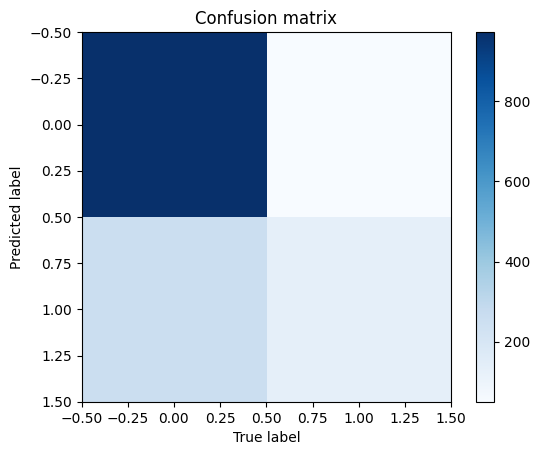

In [29]:
from sklearn.metrics import confusion_matrix


# Get the true labels and the predicted labels
true_labels, predicted_labels = y_test, model.predict(X_test)

# Create the confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.imshow(confusion_matrix, cmap="Blues")
plt.colorbar()
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.title("Confusion matrix")
plt.show()

In [30]:
confusion_matrix #it is a good model with tp=988 and fn=123

array([[973,  50],
       [256, 130]])

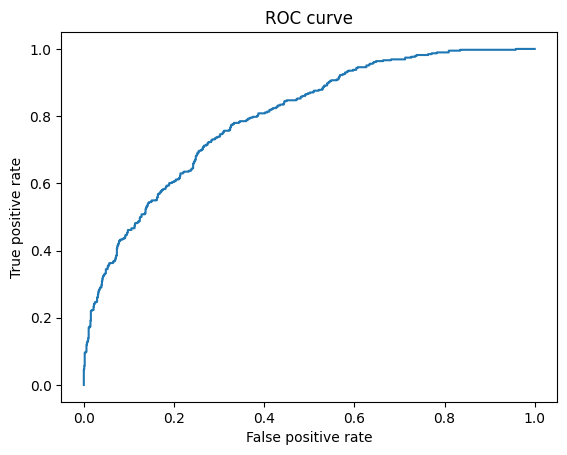

AUC: 0.7985466397216354


In [31]:
from sklearn.metrics import roc_curve, auc

predicted_probabilities=model.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

# Calculate the AUC
auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.show()

print("AUC:", auc)

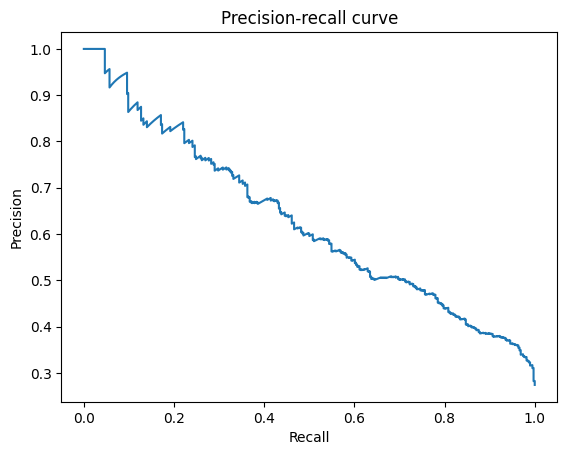

In [32]:
from sklearn.metrics import precision_recall_curve, auc

# Get the true labels and the predicted probabilities
true_labels, predicted_probabilities = y_test, model.predict_proba(X_test)[:, 1]

# Calculate the precision and recall
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_probabilities)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall curve")
plt.show()